<a href="https://colab.research.google.com/github/sub-blind/lecture5.ipynb/blob/main/lecture5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


# Filtering Data
Filter only DataFrame with numeric attribute.

In [3]:
df.describe().columns

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')

In [4]:
numeric_df = df[df.describe().columns]
numeric_df

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17.0,21.0,2.5,109.0,4500.0,2915.0,21.1,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0
89,17.6,20.0,22.4,21.0,30.0,2.0,134.0,5800.0,2685.0,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0
90,22.9,23.3,23.7,18.0,25.0,2.8,178.0,5800.0,2385.0,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0
91,21.8,22.7,23.5,21.0,28.0,2.3,114.0,5400.0,2215.0,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0


Print rows with **RPM** greater(초과) than **6000** in numeric_df

In [5]:
rpm_over_6000 = numeric_df[numeric_df['RPM']>6000]
rpm_over_6000

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
31,8.4,10.1,11.9,23.0,30.0,1.8,127.0,6500.0,2410.0,13.2,5.0,171.0,98.0,67.0,36.0,28.0,12.0,2530.0
56,32.5,32.5,32.5,17.0,25.0,1.3,255.0,6500.0,2325.0,20.0,2.0,169.0,96.0,69.0,NaN,NaN,NaN,NaN
92,24.8,26.7,28.5,20.0,28.0,2.4,168.0,6200.0,NaN,19.3,5.0,184.0,105.0,69.0,38.0,30.0,15.0,3245.0


Print rows with **Max.Price** less(미만) than **16.0** and **Passengers** more(이상) than **5.0**

In [6]:
max_price_and_passengers = numeric_df[(numeric_df['Max.Price']<16.0) &
                                      (numeric_df['Passengers'] >= 5.0)]
max_price_and_passengers

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
12,11.4,11.4,11.4,25.0,34.0,2.2,110.0,5200.0,2665.0,15.6,5.0,184.0,103.0,68.0,39.0,26.0,NaN,2785.0
22,7.9,9.2,10.6,29.0,33.0,1.5,92.0,6000.0,3285.0,NaN,5.0,174.0,98.0,66.0,32.0,NaN,11.0,2270.0
23,8.4,11.3,14.2,23.0,29.0,2.2,93.0,4800.0,NaN,14.0,5.0,172.0,97.0,67.0,38.0,26.5,NaN,2670.0
24,11.9,13.3,14.7,22.0,27.0,2.5,100.0,4800.0,2535.0,NaN,6.0,181.0,104.0,68.0,39.0,30.5,NaN,2970.0
31,8.4,10.1,11.9,23.0,30.0,1.8,127.0,6500.0,2410.0,13.2,5.0,171.0,98.0,67.0,36.0,28.0,12.0,2530.0
32,10.4,11.3,12.2,22.0,27.0,2.3,96.0,4200.0,2805.0,15.9,5.0,177.0,100.0,68.0,NaN,27.5,13.0,NaN
43,6.8,8.0,9.2,29.0,33.0,1.5,81.0,5500.0,2710.0,11.9,5.0,168.0,94.0,63.0,35.0,26.0,11.0,2345.0
44,9.0,10.0,11.0,NaN,29.0,1.8,124.0,6000.0,2745.0,13.7,5.0,172.0,98.0,66.0,36.0,28.0,12.0,2620.0
46,12.4,13.9,15.3,20.0,27.0,2.0,128.0,6000.0,2335.0,17.2,5.0,184.0,104.0,69.0,41.0,31.0,NaN,2885.0
53,10.9,11.6,12.3,28.0,36.0,1.8,103.0,5500.0,2220.0,14.5,5.0,172.0,98.0,66.0,36.0,26.5,13.0,2440.0


# Handling Outlier

Remove outliers of length.

Use IQR first here.

* Assume that `Length` of outlier is greater than `Q3 + (1.5 * IQR)`, less than `Q1 - (1.5 * IQR)`

In [7]:
attribute = 'Length'


Q3= df[attribute].quantile(.75)
Q1= df[attribute].quantile(.25)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

filtered_df = df[(df[attribute]< Q3 + outlier_step )&
                (df[attribute]> Q1 - outlier_step )]

Draw histogram of `Length`.

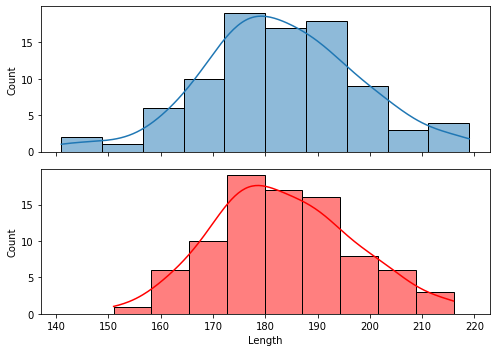

In [8]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x=attribute, ax=axes[0], kde=True)
sns.histplot(data=filtered_df, x=attribute, color='Red',
             ax=axes[1], kde=True)
f.tight_layout()

Use Z-score in here.

In [9]:
upper_limit = df[attribute].mean() + 2 * df[attribute].std()
lower_limit = df[attribute].mean() - 2 * df[attribute].std()

filtered_df = df[(df[attribute] < upper_limit) &
                 (df[attribute] > lower_limit)]

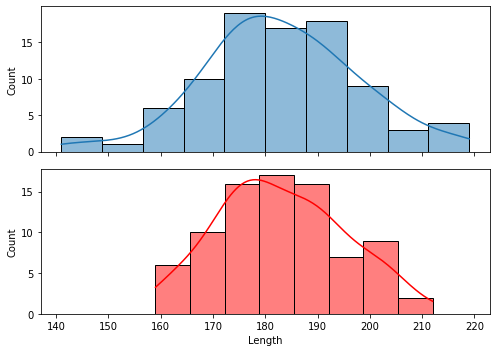

In [10]:
f, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.histplot(data=df, x=attribute, ax=axes[0], kde=True)
sns.histplot(data=filtered_df, x=attribute, color='Red',
             ax=axes[1], kde=True)
f.tight_layout()

# Hanlding Missing Value
---
Last time, we dropped the NaN value, impute this time.

print the `head()` of numeric_df

In [11]:
numeric_df.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,NaN,37.7,44.6,19.0,26.0,NaN,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0
4,NaN,30.0,NaN,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


There are many NaN values exist. 

Use `info()` to check the details.

In [12]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           86 non-null     float64
 1   Price               91 non-null     float64
 2   Max.Price           88 non-null     float64
 3   MPG.city            84 non-null     float64
 4   MPG.highway         91 non-null     float64
 5   EngineSize          91 non-null     float64
 6   Horsepower          86 non-null     float64
 7   RPM                 90 non-null     float64
 8   Rev.per.mile        87 non-null     float64
 9   Fuel.tank.capacity  85 non-null     float64
 10  Passengers          91 non-null     float64
 11  Length              89 non-null     float64
 12  Wheelbase           92 non-null     float64
 13  Width               87 non-null     float64
 14  Turn.circle         88 non-null     float64
 15  Rear.seat.room      89 non-null     float64
 16  Luggage.ro

Impute the data with missing value with `SimpleImputer` with `mean`.

In [13]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(numeric_df)
##########

imputed_numeric_df = pd.DataFrame(imp_mean.transform(numeric_df),columns = numeric_df.columns)
imputed_numeric_df.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.900000,15.9,18.800000,25.0,31.0,1.800000,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.000000,37.0,26.5,13.986486,2705.0
1,29.200000,33.9,38.700000,18.0,25.0,3.200000,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.000000,38.0,30.0,15.000000,3560.0
2,25.900000,29.1,32.300000,20.0,26.0,2.800000,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.000000,37.0,28.0,14.000000,3375.0
3,17.118605,37.7,44.600000,19.0,26.0,2.658242,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,69.448276,37.0,31.0,17.000000,3405.0
4,17.118605,30.0,21.459091,22.0,30.0,3.500000,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.000000,39.0,27.0,13.000000,3640.0


Check through `info()` that NaN values don't exist any more.

In [14]:
imputed_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Min.Price           93 non-null     float64
 1   Price               93 non-null     float64
 2   Max.Price           93 non-null     float64
 3   MPG.city            93 non-null     float64
 4   MPG.highway         93 non-null     float64
 5   EngineSize          93 non-null     float64
 6   Horsepower          93 non-null     float64
 7   RPM                 93 non-null     float64
 8   Rev.per.mile        93 non-null     float64
 9   Fuel.tank.capacity  93 non-null     float64
 10  Passengers          93 non-null     float64
 11  Length              93 non-null     float64
 12  Wheelbase           93 non-null     float64
 13  Width               93 non-null     float64
 14  Turn.circle         93 non-null     float64
 15  Rear.seat.room      93 non-null     float64
 16  Luggage.ro

# Balancing Data

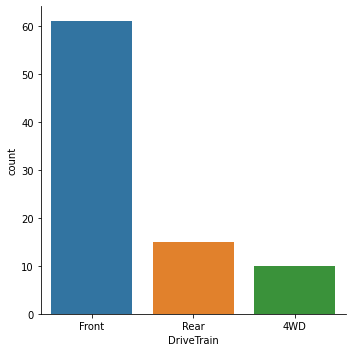

In [15]:
sns.catplot(data=df, kind="count", x='DriveTrain')
f.tight_layout()

Undersample the `Front` and `Rear` cars as much as `4WD` cars.

In [16]:
df.DriveTrain == 'Front'

0      True
1      True
2      True
3     False
4     False
      ...  
88     True
89     True
90     True
91    False
92     True
Name: DriveTrain, Length: 93, dtype: bool

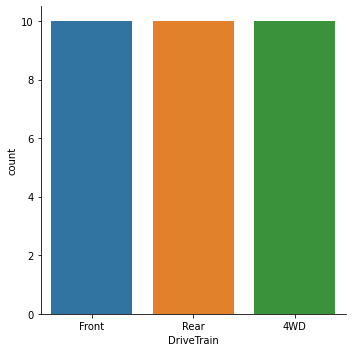

In [17]:
num_0 = sum(df.DriveTrain == 'Front')
num_1 = sum(df.DriveTrain == 'Rear')
num_2 = sum(df.DriveTrain == '4WD')

# random undersample


undersampledDf = pd.concat([df[df["DriveTrain"]=="Front"].sample(num_2),
                           df[df["DriveTrain"]=="Rear"].sample(num_2),
                           df[df["DriveTrain"]=="4WD"]])

sns.catplot(data=undersampledDf, kind="count", x='DriveTrain')
f.tight_layout()

# Todo!

**[Preface]**

1. 지난 번 과제가 너무 어렵다는 소식을 듣고 난이도를 최대한 완화했어요, 조건으로 여러분의 생각에 제약을 걸기보단 도움을 많이 드릴 예정이에요!

2. 그러니 마음 편히 먹고 출발해봅시다!

3. 그래도 너무 어려우면 손들거나 이루리로 달려가기! (대신 문제 읽자마자 이루리로 달려가진 마세요...)

## 1. 로그 데이터 분석으로 이상 사용자 검출하기


곰돌대학교 수강신청 사이트 관리자가 데이터 분석을 의뢰했습니다, 대학교 익명 커뮤니티에 수강신청을 돕는 매크로 프로그램이 유포된 바람에 비정상적으로 수강신청을 한 학생이 있다고 하네요!

하지만 증거를 수집하기 전에 게시글이 삭제되어서 관리자는 해당 매크로 프로그램의 기능을 알지 못하는 상황이에요.

매크로를 사용했다고 의심이 가는 학생의 학번 리스트와 행동양상을 파악해주세요!

&nbsp;

---


**[Notion]**

* 해당 데이터는 가상의 데이터이며, 등장하는 학번들은 모두 허구에요. 즉, 랜덤으로 생성된 데이터이기 때문에 실존 인물의 학번과 아무런 관련이 없어요!

* 만약 학번이 겹친다면, 정말 우연의 일치인거예요!! numpy의 선택을 받은 것이니 너무 기분 나빠하지 마세요!

&nbsp;

---

**[About Data]**
* `code_student`는 가상의 학번으로 곰돌대학교 학생을 특정할 때 사용해요.
* `time_spent`는 수강신청 사이트에서 머무른 시간으로 단위는 's'(초)에요.
* `click_per_min`는 수강신청 사이트에서 분당 클릭한 평균 횟수에요.
* `refresh_per_min`는 수강신청 사이트에서 분당 새로고침, 사이트 이동을 시도한 평균 횟수에요.
* `delay_time`은 서버와의 지연을 의미하며, 단위는 'ns'(나노세컨드)에요.

In [18]:
df = pd.read_excel('https://github.com/TA-YSH/DAP/raw/main/lab5/lab5_student_data.xlsx', index_col = 0)
df

,code_student,time_spent,click_per_min,refresh_per_min,delay_time
0,201810130,471.551388,54,18,25.283161
1,201810574,723.369401,42,19,25.594568
2,201810806,653.702642,21,19,21.323300
3,201810859,603.981965,68,17,39.148978
4,201811217,510.630862,30,20,29.151656
...,...,...,...,...,...
295,202218787,558.945241,50,21,33.381013
296,202219052,555.837431,46,22,28.891619
297,202219648,670.720211,43,21,30.863044
298,202219691,406.228555,47,22,25.097369


### 1.1 데이터 형태 파악하기
---

우선 `code_student`를 제외한 다른 모든 속성에 대해 describe를 출력해주세요!

In [19]:
df[['time_spent','click_per_min','refresh_per_min','delay_time']].describe()

,time_spent,click_per_min,refresh_per_min,delay_time
count,300.000000,300.000000,300.000000,300.000000
mean,632.126949,46.823333,20.060000,28.751335
std,151.666971,12.598460,4.541492,5.333119
min,223.749103,21.000000,11.000000,9.707395
25%,528.959635,39.000000,18.000000,25.957021
50%,638.356663,45.000000,19.000000,29.302176
75%,731.592466,51.000000,21.000000,31.967153
max,982.938188,109.000000,47.000000,43.194162


### 1.2 연관도 분석하기
---

연관성을 확인해보기 위해, `code_student`를 제외한 다른 모든 속성에 대해 `Pearson correlation coefficient`와 `pairplot`를 출력해주세요.

전체적인 데이터 분포와 이상값들이 어떻게 분포되어 있는지 대충 파악하실 수 있을 거예요.

&nbsp;

**[hint]**

1. 어디서 많이 본 내용이지 않나요?

2. 위키백과 `상관분석`의 문서에 따르면 pearson correlation의 결과 p는 다음과 같이 해석이 가능하다고 해요.

* r이 **-1.0과 -0.7 사이**면, `강한 음적 선형관계`

* r이 **-0.7과 -0.3 사이**면, `뚜렷한 음적 선형관계`
* r이 **-0.3과 -0.1 사이**면, `약한 음적 선형관계`
* r이 **-0.1과 +0.1 사이**면, `거의 무시될 수 있는 선형관계`
* r이 **+0.1과 +0.3 사이**면, `약한 양적 선형관계`
* r이 **+0.3과 +0.7 사이**면, `뚜렷한 양적 선형관계`
* r이 **+0.7과 +1.0 사이**면, `강한 양적 선형관계`


In [20]:
df[['time_spent','click_per_min','refresh_per_min','delay_time']].corr(method='pearson')

,time_spent,click_per_min,refresh_per_min,delay_time
time_spent,1.000000,0.030848,0.084636,0.021354
click_per_min,0.030848,1.000000,0.624823,-0.472252
refresh_per_min,0.084636,0.624823,1.000000,-0.535295
delay_time,0.021354,-0.472252,-0.535295,1.000000


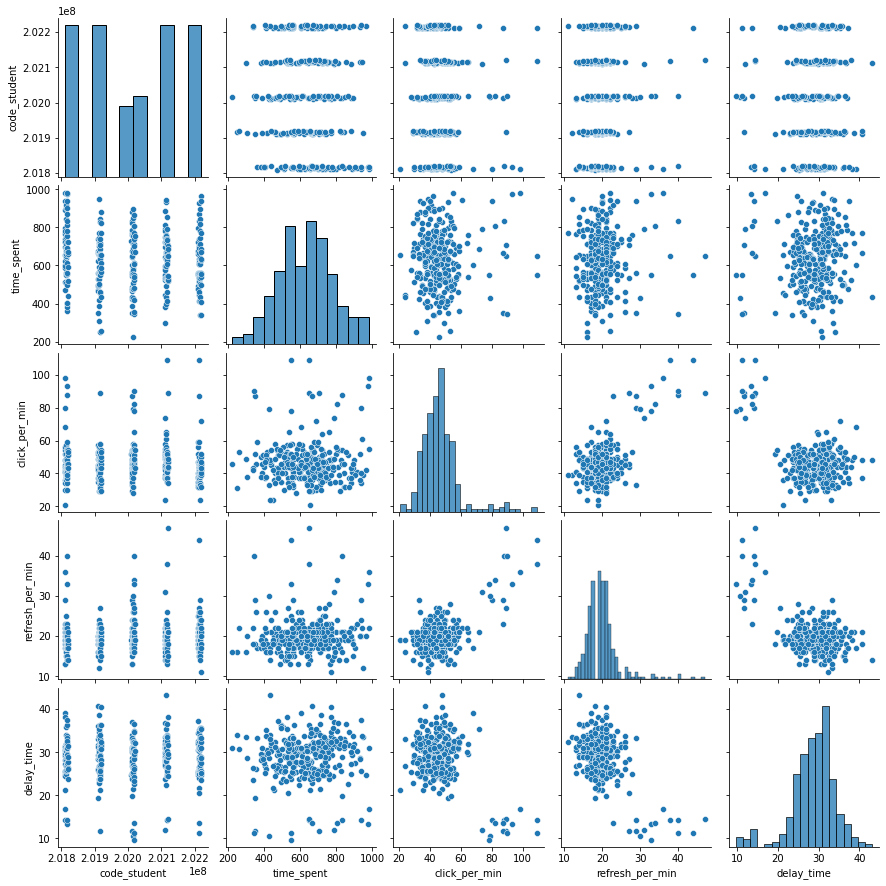

In [21]:
g = sns.pairplot(df)
plt.show()

### 1.3 Outlier 검출하기

---

눈으로 보았을 때에는 Outlier가 누구인지 대충 알 수 있지 않나요?

하지만 우리가 눈으로 보는 것만큼 컴퓨터가 이해하지는 못하겠죠? 컴퓨터가 이해하려면 정확하고 타이트한 조건을 걸어줘야 해요.

hint를 참고하여 각 속성에 따라 Outlier를 검출하는 조건을 세우고, `해당 조건에 하나라도 충족되는 사람들을` 우선 `outlier_candidate1`에 저장하세요.


**[hint]**

1. 1.2 절에서의 그래프를 주목해주세요, 해당 그래프는 `어떤 속성`의 Outlier를 `어떤 방식`으로 검출할 지 알려주고 있어요.

2. Outlier를 검출하기 위해서, `quantile`을 사용하는 방법과 `z-score`을 사용하는 방법이 있습니다. 과연 어떤 방법이 제일 적절할까요?

- 두 방법 모두 lecture note에서 설명하고 있는 표준을 따르세요 (outlier_step = 1.5, z-score = 3)


In [22]:
attribute = ['click_per_min','refresh_per_min','delay_time']

Q1 = df[attribute].quantile(.25)

Q3 = df[attribute].quantile(.75)

IQR = Q3 - Q1

outlier_step = 1.5 *IQR

outlier_candidate1 =df[(df['click_per_min'] > Q3[0] + outlier_step[0])  |
                       (df['refresh_per_min'] > Q3[1] + outlier_step[1])  |
                       (df['delay_time'] < Q1[2] - outlier_step[2])]

outlier_candidate1

,code_student,time_spent,click_per_min,refresh_per_min,delay_time
9,201811933,936.842404,80,29,14.212713
10,201811958,982.938188,98,36,16.900198
38,201816880,976.924134,93,33,13.409298
53,201818738,833.032116,88,40,14.277280
108,201917437,706.152384,89,27,11.676547
139,202012285,352.147033,87,29,11.646584
146,202014166,760.948801,53,28,25.014618
147,202014741,588.798337,49,26,32.328047
156,202016312,429.603214,79,30,10.641860
162,202017340,345.932692,90,40,11.144838


### 1.4 `abuser` 속성 추가하기

---

df에 `abuser`라는 속성을 추가할거예요. 다음 조건을 준수해서 df에 `abuser`속성을 추가해주세요!

**[abuser]**
* `abuser`의 초기값은 **False** 겠죠?
* 만약 이상치 검사로 outlier로 판명될 경우, `abuser`의 값이 **True**가 되는거예요.
* 즉, outlier_candidate 명단에 포함되었을 경우 df에서 해당 row의 `abuser` 속성이 **True**가 되는거죠.

**[hint]**

* DataFrame에서 하나의 요소의 값을 바꾸려면 loc를 사용해보세요 (ex: df.loc[1, 'name'] = '유서후')

In [23]:
df['abuser'] = False
for i in outlier_candidate1.index:
  df.loc[i, 'abuser'] = True


df[df['abuser']] 

,code_student,time_spent,click_per_min,refresh_per_min,delay_time,abuser
9,201811933,936.842404,80,29,14.212713,True
10,201811958,982.938188,98,36,16.900198,True
38,201816880,976.924134,93,33,13.409298,True
53,201818738,833.032116,88,40,14.277280,True
108,201917437,706.152384,89,27,11.676547,True
139,202012285,352.147033,87,29,11.646584,True
146,202014166,760.948801,53,28,25.014618,True
147,202014741,588.798337,49,26,32.328047,True
156,202016312,429.603214,79,30,10.641860,True
162,202017340,345.932692,90,40,11.144838,True


`abuser`을 구분하면서 pairplot을 다시 그려볼거예요.

하지만 이번 Lab은 Outlier 구분이 주요 쟁점이므로 코드를 따로 입력하지 않으셔도 괜찮습니다!

그냥 실행 버튼을 편하게 눌러주세요!

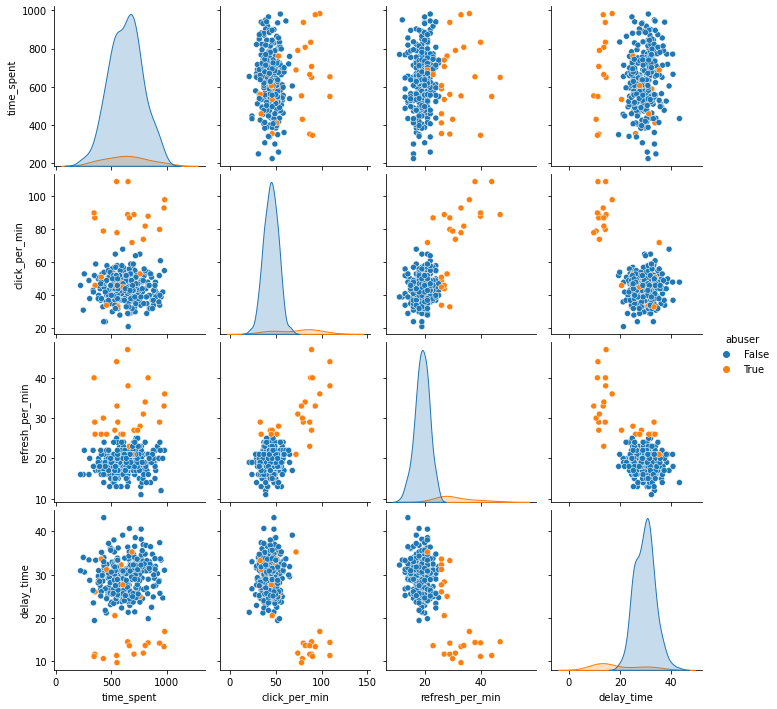

In [24]:
g = sns.pairplot(df.drop(columns=['code_student']), hue='abuser')
plt.show()

### 1.5 Condition 세부조정하기1

---

그래프를 보았을 때, 실제로 정상 범주라고 추정되는 사람들도 Outlier로 검출된 것 같지 않나요?

컴퓨터는 정말 피도 눈물도 없는 냉정한 성격인걸까요?

아니면 우리가 Outlier라고 판단하는 조건을 너무 넓게 설정했을지도 모릅니다.

이번에는 조건을 조금 타이트하게 좁혀 Outlier들을 특정해봅시다!

`1.3 절`에서 `사용한 조건에 모두 포함된 학생`만 Outlier로 판별하도록 조정하고 df를 갱신하세요.

df에 대해 pariplot를 출력시 결과처럼 그림이 나와야 합니다.

**[condition]**

* z score 값, 혹은 outlier step의 계수는 변경하지 마세요.


**[hint]**

* 중복되는 코드, 조건들을 미리 변수에 담아두셨으면 쉽게 작성하실 수 있을거예요.

* df에서 `abuser`속성을 **False**로 초기화하고, 포함된 학생들을 **True**로 바꿔주는 코드는 위에서 복붙해서 사용하세요.

* df에는 해당 조건을 기준으로 Outlier로 판명된 학생의 `abuser`속성이 **True**가 되어있어야 합니다!


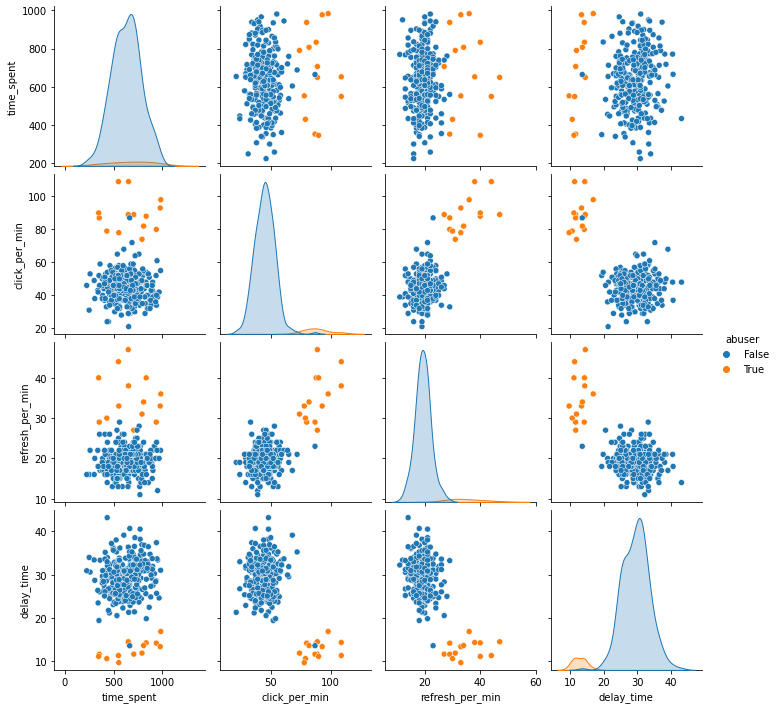

In [25]:
##############
outlier_candidate1 =df[(df['click_per_min'] > Q3[0] + outlier_step[0])  &
                       (df['refresh_per_min'] > Q3[1] + outlier_step[1])  &
                       (df['delay_time'] < Q1[2] - outlier_step[2])]

df['abuser'] = False
for i in outlier_candidate1.index:
  df.loc[i, 'abuser'] = True

##############
g = sns.pairplot(df.drop(columns=['code_student']), hue='abuser')
plt.show()

### 1.6 Condition 세부조정하기2

이번에는 Outlier라고 생각했던 값도 조건이 너무 빡빡한 탓에 걸러내지 못한 것 같군요.

조건을 조금 수정해봐야겠어요, 중학교 때 배운 집합을 생각해볼까요? 

**[hint]**

지금까지의 집합을 조건으로 표현하여

* **set A = {click_per_mind 의 Outlier}**

* **set B = {refresh_per_min의 Outlier}**

* **set C = {delay_time의 Outlier}**

이라고 가정해볼까요?

이 경우,

1. 우리가 처음 사용한 조건을 집합 수식으로 이렇게 정리할 수 있지 않을까요? $$condition_1 = A \cup B \cup C$$ 

2. 그 다음 사용한 조건을 집합 수식으로 정리하면 아래와 같겠죠? $$condition_2 = A \cap B \cap C$$

3. 그렇다면 우리가 놓친 조건은 무엇일까요?

4. 1.5절과 비슷한 문제에요! 조건을 수정하여 Outlier들을 구분하고 df를 갱신하여 그래프와 같은 그림이 나오도록 코드를 작성하세요.

5. z score 값, 혹은 outlier step의 계수는 변경하지 마세요.


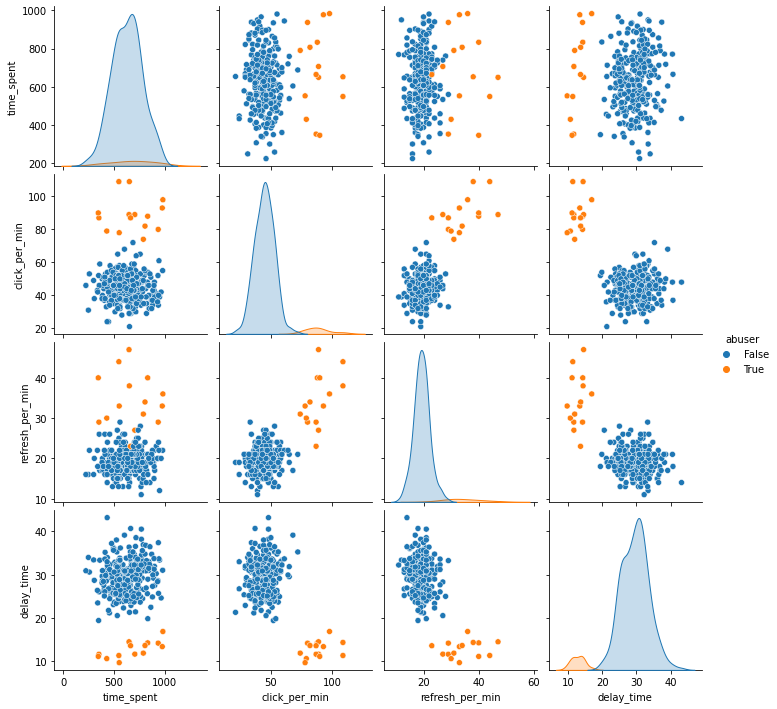

In [26]:
##############
outlier_candidate1 =df[(df['click_per_min'] > Q3[0] + outlier_step[0])  &
                       (df['refresh_per_min'] > Q3[1] + outlier_step[1])  |
                       (df['delay_time'] < Q1[2] - outlier_step[2])]

df['abuser'] = False
for i in outlier_candidate1.index:
  df.loc[i, 'abuser'] = True

##############
g = sns.pairplot(df.drop(columns=['code_student']), hue='abuser')
plt.show()

### 1.7 결과 작성 및 분석

---

조건을 잘 잡았더니 Outlier이 잘 검출된 것을 확인할 수 있죠?

Outlier로 판명되어서 조사가 필요한 학생의 학번의 리스트를 출력하고, msg칸에 Outlier의 행동 패턴을 기록해서 출력해주세요!

여러분께서 하셔야할 것은 다음과 같습니다!

**[Todo!]**
1. outliers에는 outlier로 검출된 학생들의 학번을 넣어주세요.
2. msg에는 ###를 지우고 행동 양상이 정상 사용자와 어떻게 다른지 `분당 클릭 횟수`, `분당 새로고침 횟수`, `서버 지연시간`을 정상 사용자와 비교하여 작성해주세요. `의미만 맞으면 모두 정답으로 인정할게요!`

3. outliers와 msg를 print 해주세요!

In [27]:
outliers = outlier_candidate1['code_student']
msg = "outlier은 다음과 같으며, outlier들의 행동 양상은 기존 사용자에 비해 분당 새로고침 횟수가 많고  분당 클릭 횟수 또한 일반 사용자보다 많았습니다. 서버 지연시간 측면에서는 일반 사용자보다 적은것으로 드러났습니다.."

print(msg)
print(outliers)

outlier은 다음과 같으며, outlier들의 행동 양상은 기존 사용자에 비해 분당 새로고침 횟수가 많고  분당 클릭 횟수 또한 일반 사용자보다 많았습니다. 서버 지연시간 측면에서는 일반 사용자보다 적은것으로 드러났습니다..
9      201811933
10     201811958
38     201816880
53     201818738
108    201917437
139    202012285
156    202016312
162    202017340
169    202017957
172    202018326
180    202110260
230    202117531
237    202119541
255    202211912
258    202212354
Name: code_student, dtype: int64


### 1.8 Oversampling

---
`
이번에는 추후 대책으로 매크로를 막는 인공지능을 학습하기 위해, 데이터를 전처리하는 과정을 다뤄보려고 해요.

방금 최대한 합리적인 조건으로 Outlier을 검출했었죠? 그런데 Outlier은 300명중 고작 15명 밖에 되지 않았어요.

이 경우 Data의 불균형이 너무 크게 일어나서, 인공지능이 학습을 제대로 하지 못하는 상황이 발생할 가능성이 높죠!

smote를 이용해서 df의 `abuser` 속성이 1:1이 되도록 조정한 `dummy`라는 DataFrame을 만들고 출력해주세요.

**[hint]**

1. `dummy`는 원본 `df`에 대해, `abuser` 속성의 **True**와 **False**의 비율이 1:1인 Oversampling된 DataFrame이에요.

2. 그리고 학번을 가상적으로 만들 수는 없으니, `code_student` 속성은 존재하지 않아요.

3. SMOTE가 업데이트 되는 바람에 수업자료와는 약간 내용이 다릅니다! 처음 SMOTE를 선언할 때, `sampling_strategy` argument에 **minority**를 주시고, `k_neighbors` argument에 **14**를 부여하세요.

4. X_sm으로 새로운 데이터프레임을 만들 때 들어가는 columns를 잘 생각해보세요.

5. y_sm가 무엇을 상징하는 것일까요? 함수에서 x와 y의 관계를 생각해보세요.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', k_neighbors=14)

X_sm, y_sm = smote.fit_resample(df.drop(columns = 'abuser'), df['abuser'])

###################
dummy = pd.DataFrame(X_sm, columns = ['time_spent', 'click_per_min', 'refresh_per_min', 'delay_time'])
dummy['abuser'] = y_sm
###################

dummy

,time_spent,click_per_min,refresh_per_min,delay_time,abuser
0,471.551388,54,18,25.283161,False
1,723.369401,42,19,25.594568,False
2,653.702642,21,19,21.323300,False
3,603.981965,68,17,39.148978,False
4,510.630862,30,20,29.151656,False
...,...,...,...,...,...
565,478.451529,81,31,10.423035,True
566,439.279474,79,29,10.709979,True
567,937.787725,92,31,13.435557,True
568,391.797839,83,34,10.869124,True


Dummy에서 `abuser` 속성이 **True**인 개체들이 적당하게 잘 생성되었는지 확인해볼까요?

따로 코드를 입력하실 필요는 없습니다!

In [ ]:
g = sns.pairplot(dummy, hue='abuser')
plt.show()

`abuser`속성의 True와 False 개수가 같은지 확인해보세요.

꼭 출력값과 같은 형태가 아니더라도 True의 개수와 False의 개수가 출력 결과로 보여져서 같다는 것이 입증 된다면, 정답으로 인정해드려요.

In [30]:
dummy['abuser'].value_counts()

False    285
True     285
Name: abuser, dtype: int64

끝! 

고생 많으셨고, 오류가 일어나는 출력이 없는지 잘 확인하시고 제출해주세요!